In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1) Beginning by reading in the files I need into dataframes

In [3]:
#pulling in clean census data (income data)
cln_census_df = pd.read_csv("C:\\Users\\ekims\\Documents\\NSS\\DA14\\capstone\\capstone\\data\\clean_census_df.csv")

In [4]:
cln_census_df.head()

,Geography,Geographic Area Name,County,State,est_pop_>15yrs,e_inc<10000,mar_err<10000,e_inc_10k_<15k,mar_err_inc_10k_<15k,e_inc_15K_<25K,mar_err_inc_15K_<25K,est_hh_cash_asst,mar_err_hh_cash_asst,est_hh_snap,mar_err_hh_snap
0,0500000US01001,"Autauga County, Alabama",Autauga County,Alabama,47508,831,221,676,211,1785,395,151,88,1974,276
1,0500000US01003,"Baldwin County, Alabama",Baldwin County,Alabama,195048,3958,714,3584,629,6066,703,843,226,6480,848
2,0500000US01005,"Barbour County, Alabama",Barbour County,Alabama,20253,963,223,587,163,1292,201,168,65,2013,317
3,0500000US01007,"Bibb County, Alabama",Bibb County,Alabama,18176,483,147,603,207,833,220,383,137,1535,336
4,0500000US01009,"Blount County, Alabama",Blount County,Alabama,47389,1343,325,1185,281,1771,254,447,151,2706,460


In [5]:
#pulling in county medicaid enrollment data
co_enroll_df = pd.read_csv("C:\\Users\\ekims\\Documents\\NSS\\DA14\\capstone\\capstone\\data\\master_co_df.csv")

In [6]:
co_enroll_df.head()

,State,County Name,Total Medicaid Coverage Rate,Child Medicaid/CHIP Coverage Rate,Adult Medicaid Coverage Rate,Senior Medicaid Coverage Rate,Child Medicaid Coverage Rate
0,Alabama,Autauga County,18.7,42.0,10.7,13.3,NaN
1,Alabama,Baldwin County,16.4,41.1,8.9,10.6,NaN
2,Alabama,Barbour County,27.3,53.5,19.0,23.0,NaN
3,Alabama,Bibb County,21.8,48.3,13.8,15.6,NaN
4,Alabama,Blount County,18.4,42.0,10.0,14.2,NaN


In [7]:
#concating State and County Name for merging later
co_enroll_df['Geographic Area Name'] = co_enroll_df['County Name'] + ', ' + co_enroll_df['State']
co_enroll_df.head()

,State,County Name,Total Medicaid Coverage Rate,Child Medicaid/CHIP Coverage Rate,Adult Medicaid Coverage Rate,Senior Medicaid Coverage Rate,Child Medicaid Coverage Rate,Geographic Area Name
0,Alabama,Autauga County,18.7,42.0,10.7,13.3,NaN,"Autauga County, Alabama"
1,Alabama,Baldwin County,16.4,41.1,8.9,10.6,NaN,"Baldwin County, Alabama"
2,Alabama,Barbour County,27.3,53.5,19.0,23.0,NaN,"Barbour County, Alabama"
3,Alabama,Bibb County,21.8,48.3,13.8,15.6,NaN,"Bibb County, Alabama"
4,Alabama,Blount County,18.4,42.0,10.0,14.2,NaN,"Blount County, Alabama"


In [8]:
#pulling in state medicaid income eligibility data
st_inc_eli = pd.read_csv("C:\\Users\\ekims\\Documents\\NSS\\DA14\\capstone\\capstone\\data\\medicaid_income_by_state_2025.csv")

In [9]:
st_inc_eli.head()

,State,Expanded,Limit (%FPL),Monthly Limit (approx),Yearly
0,Alabama,No,38,$987,"$11,844"
1,Alaska,Yes,138,"$1,795","$21,540"
2,Arizona,Yes,138,"$1,305","$15,660"
3,Arkansas,Yes,138,"$1,043","$12,520"
4,California,Yes,138,"$1,801","$21,612"


In [10]:
#reading in additional population data
pop_df = pd.read_csv("C:\\Users\\ekims\\Documents\\NSS\\DA14\\capstone\\capstone\\data\\pop_clean.csv")

In [11]:
pop_df.head()

,Geography,Geographic Area Name,County,State,E_Total_pop,pop_under_5yrs,pop_5_to_9yrs,pop_10_to_14yrs,pop_15_to_19yrs,pop_65_to_69yrs,pop_70_to_74yrs,pop_75_to_79yrs,pop_80_to_84yrs,pop_>85yrs
0,0500000US01001,"Autauga County, Alabama",Autauga County,Alabama,59285,3430,3411,4338,3922,2842,2617,2200,1018,797
1,0500000US01003,"Baldwin County, Alabama",Baldwin County,Alabama,239945,12448,13152,16079,14603,16183,14726,10196,5411,4810
2,0500000US01005,"Barbour County, Alabama",Barbour County,Alabama,24757,1380,1684,1201,1425,1589,1239,1184,476,393
3,0500000US01007,"Bibb County, Alabama",Bibb County,Alabama,22152,1069,1387,1221,1348,1212,963,831,524,226
4,0500000US01009,"Blount County, Alabama",Blount County,Alabama,59292,3397,3601,4159,3810,3729,2772,2144,1405,969


In [12]:
#calculating new columns for total child, senior, and adult population
pop_df ['child_pop'] = pop_df['pop_under_5yrs'] + pop_df['pop_5_to_9yrs'] + pop_df['pop_10_to_14yrs'] + pop_df['pop_15_to_19yrs']
pop_df ['senior_pop'] = pop_df['pop_65_to_69yrs'] + pop_df['pop_70_to_74yrs'] + pop_df['pop_75_to_79yrs'] + pop_df['pop_80_to_84yrs'] + pop_df['pop_>85yrs']
pop_df ['adult_pop'] = pop_df['E_Total_pop'] - (pop_df['child_pop'] + pop_df['senior_pop'])
pop_df.head()

,Geography,Geographic Area Name,County,State,E_Total_pop,pop_under_5yrs,pop_5_to_9yrs,pop_10_to_14yrs,pop_15_to_19yrs,pop_65_to_69yrs,pop_70_to_74yrs,pop_75_to_79yrs,pop_80_to_84yrs,pop_>85yrs,child_pop,senior_pop,adult_pop
0,0500000US01001,"Autauga County, Alabama",Autauga County,Alabama,59285,3430,3411,4338,3922,2842,2617,2200,1018,797,15101,9474,34710
1,0500000US01003,"Baldwin County, Alabama",Baldwin County,Alabama,239945,12448,13152,16079,14603,16183,14726,10196,5411,4810,56282,51326,132337
2,0500000US01005,"Barbour County, Alabama",Barbour County,Alabama,24757,1380,1684,1201,1425,1589,1239,1184,476,393,5690,4881,14186
3,0500000US01007,"Bibb County, Alabama",Bibb County,Alabama,22152,1069,1387,1221,1348,1212,963,831,524,226,5025,3756,13371
4,0500000US01009,"Blount County, Alabama",Blount County,Alabama,59292,3397,3601,4159,3810,3729,2772,2144,1405,969,14967,11019,33306


In [13]:
#merging population and county enrollment tables
pop_enroll_df = pd.merge(pop_df, co_enroll_df, on='Geographic Area Name', how="left")
pop_enroll_df.head()

,Geography,Geographic Area Name,County,State_x,E_Total_pop,pop_under_5yrs,pop_5_to_9yrs,pop_10_to_14yrs,pop_15_to_19yrs,pop_65_to_69yrs,...,child_pop,senior_pop,adult_pop,State_y,County Name,Total Medicaid Coverage Rate,Child Medicaid/CHIP Coverage Rate,Adult Medicaid Coverage Rate,Senior Medicaid Coverage Rate,Child Medicaid Coverage Rate
0,0500000US01001,"Autauga County, Alabama",Autauga County,Alabama,59285,3430,3411,4338,3922,2842,...,15101,9474,34710,Alabama,Autauga County,18.7,42.0,10.7,13.3,NaN
1,0500000US01003,"Baldwin County, Alabama",Baldwin County,Alabama,239945,12448,13152,16079,14603,16183,...,56282,51326,132337,Alabama,Baldwin County,16.4,41.1,8.9,10.6,NaN
2,0500000US01005,"Barbour County, Alabama",Barbour County,Alabama,24757,1380,1684,1201,1425,1589,...,5690,4881,14186,Alabama,Barbour County,27.3,53.5,19.0,23.0,NaN
3,0500000US01007,"Bibb County, Alabama",Bibb County,Alabama,22152,1069,1387,1221,1348,1212,...,5025,3756,13371,Alabama,Bibb County,21.8,48.3,13.8,15.6,NaN
4,0500000US01009,"Blount County, Alabama",Blount County,Alabama,59292,3397,3601,4159,3810,3729,...,14967,11019,33306,Alabama,Blount County,18.4,42.0,10.0,14.2,NaN


In [14]:
#changing the values of enrollment columns from whole numbers to decimals (percentages)
pop_enroll_df['Total Medicaid Coverage Rate'] = pop_enroll_df['Total Medicaid Coverage Rate'] / 100
pop_enroll_df['Child Medicaid/CHIP Coverage Rate'] = pop_enroll_df['Child Medicaid/CHIP Coverage Rate'] / 100
pop_enroll_df['Adult Medicaid Coverage Rate'] = pop_enroll_df['Adult Medicaid Coverage Rate'] / 100
pop_enroll_df['Senior Medicaid Coverage Rate'] = pop_enroll_df['Senior Medicaid Coverage Rate'] / 100
pop_enroll_df.head()

,Geography,Geographic Area Name,County,State_x,E_Total_pop,pop_under_5yrs,pop_5_to_9yrs,pop_10_to_14yrs,pop_15_to_19yrs,pop_65_to_69yrs,...,child_pop,senior_pop,adult_pop,State_y,County Name,Total Medicaid Coverage Rate,Child Medicaid/CHIP Coverage Rate,Adult Medicaid Coverage Rate,Senior Medicaid Coverage Rate,Child Medicaid Coverage Rate
0,0500000US01001,"Autauga County, Alabama",Autauga County,Alabama,59285,3430,3411,4338,3922,2842,...,15101,9474,34710,Alabama,Autauga County,0.187,0.420,0.107,0.133,NaN
1,0500000US01003,"Baldwin County, Alabama",Baldwin County,Alabama,239945,12448,13152,16079,14603,16183,...,56282,51326,132337,Alabama,Baldwin County,0.164,0.411,0.089,0.106,NaN
2,0500000US01005,"Barbour County, Alabama",Barbour County,Alabama,24757,1380,1684,1201,1425,1589,...,5690,4881,14186,Alabama,Barbour County,0.273,0.535,0.190,0.230,NaN
3,0500000US01007,"Bibb County, Alabama",Bibb County,Alabama,22152,1069,1387,1221,1348,1212,...,5025,3756,13371,Alabama,Bibb County,0.218,0.483,0.138,0.156,NaN
4,0500000US01009,"Blount County, Alabama",Blount County,Alabama,59292,3397,3601,4159,3810,3729,...,14967,11019,33306,Alabama,Blount County,0.184,0.420,0.100,0.142,NaN


In [29]:
#dropping useless column
pop_enroll_df = pop_enroll_df.drop('Child Medicaid Coverage Rate', axis = 1)
pop_enroll_df.head()

,Geography,Geographic Area Name,County,State_x,E_Total_pop,pop_under_5yrs,pop_5_to_9yrs,pop_10_to_14yrs,pop_15_to_19yrs,pop_65_to_69yrs,...,pop_>85yrs,child_pop,senior_pop,adult_pop,State_y,County Name,Total Medicaid Coverage Rate,Child Medicaid/CHIP Coverage Rate,Adult Medicaid Coverage Rate,Senior Medicaid Coverage Rate
0,0500000US01001,"Autauga County, Alabama",Autauga County,Alabama,59285,3430,3411,4338,3922,2842,...,797,15101,9474,34710,Alabama,Autauga County,0.187,0.420,0.107,0.133
1,0500000US01003,"Baldwin County, Alabama",Baldwin County,Alabama,239945,12448,13152,16079,14603,16183,...,4810,56282,51326,132337,Alabama,Baldwin County,0.164,0.411,0.089,0.106
2,0500000US01005,"Barbour County, Alabama",Barbour County,Alabama,24757,1380,1684,1201,1425,1589,...,393,5690,4881,14186,Alabama,Barbour County,0.273,0.535,0.190,0.230
3,0500000US01007,"Bibb County, Alabama",Bibb County,Alabama,22152,1069,1387,1221,1348,1212,...,226,5025,3756,13371,Alabama,Bibb County,0.218,0.483,0.138,0.156
4,0500000US01009,"Blount County, Alabama",Blount County,Alabama,59292,3397,3601,4159,3810,3729,...,969,14967,11019,33306,Alabama,Blount County,0.184,0.420,0.100,0.142


In [35]:
#creating raw number columns from raw population data and percentage enrollment data
pop_enroll_df['Total Pop Enrolled'] = pop_enroll_df['E_Total_pop'] * pop_enroll_df['Total Medicaid Coverage Rate']
pop_enroll_df['Child Pop Enrolled'] = pop_enroll_df['child_pop'] * pop_enroll_df['Child Medicaid/CHIP Coverage Rate']
pop_enroll_df['Senior Pop Enrolled'] = pop_enroll_df['senior_pop'] * pop_enroll_df['Senior Medicaid Coverage Rate']
pop_enroll_df['Adult Pop Enrolled'] = pop_enroll_df['adult_pop'] * pop_enroll_df['Adult Medicaid Coverage Rate']
pop_enroll_df.head()

,Geography,Geographic Area Name,County,State_x,E_Total_pop,pop_under_5yrs,pop_5_to_9yrs,pop_10_to_14yrs,pop_15_to_19yrs,pop_65_to_69yrs,...,State_y,County Name,Total Medicaid Coverage Rate,Child Medicaid/CHIP Coverage Rate,Adult Medicaid Coverage Rate,Senior Medicaid Coverage Rate,Total Pop Enrolled,Child Pop Enrolled,Senior Pop Enrolled,Adult Pop Enrolled
0,0500000US01001,"Autauga County, Alabama",Autauga County,Alabama,59285,3430,3411,4338,3922,2842,...,Alabama,Autauga County,0.187,0.420,0.107,0.133,11086.295,6342.420,1260.042,3713.970
1,0500000US01003,"Baldwin County, Alabama",Baldwin County,Alabama,239945,12448,13152,16079,14603,16183,...,Alabama,Baldwin County,0.164,0.411,0.089,0.106,39350.980,23131.902,5440.556,11777.993
2,0500000US01005,"Barbour County, Alabama",Barbour County,Alabama,24757,1380,1684,1201,1425,1589,...,Alabama,Barbour County,0.273,0.535,0.190,0.230,6758.661,3044.150,1122.630,2695.340
3,0500000US01007,"Bibb County, Alabama",Bibb County,Alabama,22152,1069,1387,1221,1348,1212,...,Alabama,Bibb County,0.218,0.483,0.138,0.156,4829.136,2427.075,585.936,1845.198
4,0500000US01009,"Blount County, Alabama",Blount County,Alabama,59292,3397,3601,4159,3810,3729,...,Alabama,Blount County,0.184,0.420,0.100,0.142,10909.728,6286.140,1564.698,3330.600


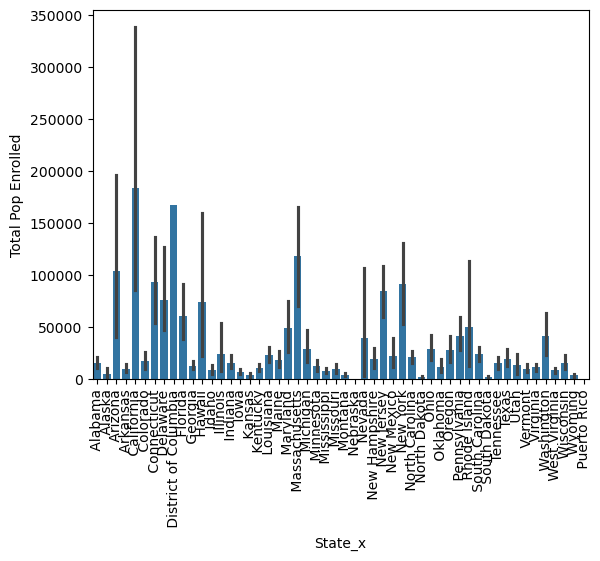

In [43]:
#sns.barplot(data = pop_enroll_df, x = pop_enroll_df['State_x'], y = pop_enroll_df['Total Pop Enrolled'])
#plt.xticks(rotation=90)
#plt.show()